In [ ]:
#Libraries imported
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/train-chennai-sale (1).csv')
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,UTILITY_AVAIL,STREET,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE
0,P03210,Karapakkam,1004,04-05-2011,131,1.0,1.0,3,AbNormal,Yes,...,AllPub,Paved,A,4.0,3.9,4.9,4.330,380000,144400,7600000
1,P09411,Anna Nagar,1986,19-12-2006,26,2.0,1.0,5,AbNormal,No,...,AllPub,Gravel,RH,4.9,4.2,2.5,3.765,760122,304049,21717770
2,P01812,Adyar,909,04-02-2012,70,1.0,1.0,3,AbNormal,Yes,...,ELO,Gravel,RL,4.1,3.8,2.2,3.090,421094,92114,13159200
3,P05346,Velachery,1855,13-03-2010,14,3.0,2.0,5,Family,No,...,NoSewr,Paved,I,4.7,3.9,3.6,4.010,356321,77042,9630290
4,P06210,Karapakkam,1226,05-10-2009,84,1.0,1.0,3,AbNormal,Yes,...,AllPub,Gravel,C,3.0,2.5,4.1,3.290,237000,74063,7406250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,03-01-2011,51,1.0,1.0,2,AdjLand,No,...,ELO,No Access,RM,3.0,2.2,2.4,2.520,208767,107060,5353000
7105,P10000,Velachery,1897,08-04-2004,52,3.0,2.0,5,Family,Yes,...,NoSeWa,No Access,RH,3.6,4.5,3.3,3.920,346191,205551,10818480
7106,P09594,Velachery,1614,25-08-2006,152,2.0,1.0,4,Normal Sale,No,...,NoSeWa,Gravel,I,4.3,4.2,2.9,3.840,317354,167028,8351410
7107,P06508,Karapakkam,787,03-08-2009,40,1.0,1.0,2,Partial,Yes,...,ELO,Paved,RL,4.6,3.8,4.1,4.160,425350,119098,8507000


In [ ]:
#Find null values
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         1
N_BATHROOM        5
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
#Datatypes 
df.dtypes

PRT_ID            object
AREA              object
INT_SQFT           int64
DATE_SALE         object
DIST_MAINROAD      int64
N_BEDROOM        float64
N_BATHROOM       float64
N_ROOM             int64
SALE_COND         object
PARK_FACIL        object
DATE_BUILD        object
BUILDTYPE         object
UTILITY_AVAIL     object
STREET            object
MZZONE            object
QS_ROOMS         float64
QS_BATHROOM      float64
QS_BEDROOM       float64
QS_OVERALL       float64
REG_FEE            int64
COMMIS             int64
SALES_PRICE        int64
dtype: object

In [ ]:
df.shape

(7109, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PRT_ID         7109 non-null   object 
 1   AREA           7109 non-null   object 
 2   INT_SQFT       7109 non-null   int64  
 3   DATE_SALE      7109 non-null   object 
 4   DIST_MAINROAD  7109 non-null   int64  
 5   N_BEDROOM      7108 non-null   float64
 6   N_BATHROOM     7104 non-null   float64
 7   N_ROOM         7109 non-null   int64  
 8   SALE_COND      7109 non-null   object 
 9   PARK_FACIL     7109 non-null   object 
 10  DATE_BUILD     7109 non-null   object 
 11  BUILDTYPE      7109 non-null   object 
 12  UTILITY_AVAIL  7109 non-null   object 
 13  STREET         7109 non-null   object 
 14  MZZONE         7109 non-null   object 
 15  QS_ROOMS       7109 non-null   float64
 16  QS_BATHROOM    7109 non-null   float64
 17  QS_BEDROOM     7109 non-null   float64
 18  QS_OVERA

In [ ]:
mode_bath = df["N_BATHROOM"].mode()[0]

mode_bed = df["N_BEDROOM"].mode()[0]

In [ ]:
df["N_BATHROOM"].fillna(mode_bath, inplace = True)
df["N_BEDROOM"].fillna(mode_bed, inplace = True)

In [ ]:
df.isna().sum()

PRT_ID            0
AREA              0
INT_SQFT          0
DATE_SALE         0
DIST_MAINROAD     0
N_BEDROOM         0
N_BATHROOM        0
N_ROOM            0
SALE_COND         0
PARK_FACIL        0
DATE_BUILD        0
BUILDTYPE         0
UTILITY_AVAIL     0
STREET            0
MZZONE            0
QS_ROOMS          0
QS_BATHROOM       0
QS_BEDROOM        0
QS_OVERALL       48
REG_FEE           0
COMMIS            0
SALES_PRICE       0
dtype: int64

In [ ]:
#change datatypes
df["DATE_BUILD"] = pd.to_datetime(df["DATE_BUILD"])
df["DATE_SALE"] = pd.to_datetime(df["DATE_SALE"])
df["N_BEDROOM"] = df["N_BEDROOM"].astype(int)
df["N_BATHROOM"] = df["N_BATHROOM"].astype(int)

In [ ]:
df.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
dtype: object

In [ ]:
df['House_Age'] = df['DATE_SALE'].dt.year - df['DATE_BUILD'].dt.year
df['House_Age']

0       44
1       11
2       20
3       22
4       30
        ..
7104    49
7105     9
7106    28
7107    32
7108    44
Name: House_Age, Length: 7109, dtype: int64

In [ ]:
df.dtypes

PRT_ID                   object
AREA                     object
INT_SQFT                  int64
DATE_SALE        datetime64[ns]
DIST_MAINROAD             int64
N_BEDROOM                 int64
N_BATHROOM                int64
N_ROOM                    int64
SALE_COND                object
PARK_FACIL               object
DATE_BUILD       datetime64[ns]
BUILDTYPE                object
UTILITY_AVAIL            object
STREET                   object
MZZONE                   object
QS_ROOMS                float64
QS_BATHROOM             float64
QS_BEDROOM              float64
QS_OVERALL              float64
REG_FEE                   int64
COMMIS                    int64
SALES_PRICE               int64
House_Age                 int64
dtype: object

In [ ]:
df["Total_Price"] = df["REG_FEE"]+df["COMMIS"]+df["SALES_PRICE"]
df["Total_Price"]

0        8124400
1       22781941
2       13672408
3       10063653
4        7717313
          ...   
7104     5668827
7105    11370222
7106     8835792
7107     9051448
7108    10405469
Name: Total_Price, Length: 7109, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   PRT_ID         7109 non-null   object        
 1   AREA           7109 non-null   object        
 2   INT_SQFT       7109 non-null   int64         
 3   DATE_SALE      7109 non-null   datetime64[ns]
 4   DIST_MAINROAD  7109 non-null   int64         
 5   N_BEDROOM      7109 non-null   int64         
 6   N_BATHROOM     7109 non-null   int64         
 7   N_ROOM         7109 non-null   int64         
 8   SALE_COND      7109 non-null   object        
 9   PARK_FACIL     7109 non-null   object        
 10  DATE_BUILD     7109 non-null   datetime64[ns]
 11  BUILDTYPE      7109 non-null   object        
 12  UTILITY_AVAIL  7109 non-null   object        
 13  STREET         7109 non-null   object        
 14  MZZONE         7109 non-null   object        
 15  QS_ROOMS       7109 n

In [ ]:
df

,PRT_ID,AREA,INT_SQFT,DATE_SALE,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,REG_FEE,COMMIS,SALES_PRICE,House_Age,Total_Price
0,P03210,Karapakkam,1004,2011-04-05,131,1,1,3,AbNormal,Yes,...,A,4.0,3.9,4.9,4.330,380000,144400,7600000,44,8124400
1,P09411,Anna Nagar,1986,2006-12-19,26,2,1,5,AbNormal,No,...,RH,4.9,4.2,2.5,3.765,760122,304049,21717770,11,22781941
2,P01812,Adyar,909,2012-04-02,70,1,1,3,AbNormal,Yes,...,RL,4.1,3.8,2.2,3.090,421094,92114,13159200,20,13672408
3,P05346,Velachery,1855,2010-03-13,14,3,2,5,Family,No,...,I,4.7,3.9,3.6,4.010,356321,77042,9630290,22,10063653
4,P06210,Karapakkam,1226,2009-05-10,84,1,1,3,AbNormal,Yes,...,C,3.0,2.5,4.1,3.290,237000,74063,7406250,30,7717313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,P03834,Karapakkam,598,2011-03-01,51,1,1,2,AdjLand,No,...,RM,3.0,2.2,2.4,2.520,208767,107060,5353000,49,5668827
7105,P10000,Velachery,1897,2004-08-04,52,3,2,5,Family,Yes,...,RH,3.6,4.5,3.3,3.920,346191,205551,10818480,9,11370222
7106,P09594,Velachery,1614,2006-08-25,152,2,1,4,Normal Sale,No,...,I,4.3,4.2,2.9,3.840,317354,167028,8351410,28,8835792
7107,P06508,Karapakkam,787,2009-03-08,40,1,1,2,Partial,Yes,...,RL,4.6,3.8,4.1,4.160,425350,119098,8507000,32,9051448


In [ ]:
del df['REG_FEE']

In [ ]:
del df['COMMIS']

In [ ]:
del df['SALES_PRICE']

**Data Cleaning**

**Retrieve the unique values in all columns**

In [ ]:
df["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'TNagar', 'T Nagar', 'Chrompt', 'Chrmpet', 'Karapakam',
       'Ana Nagar', 'Chormpet', 'Adyr', 'Velchery', 'Ann Nagar',
       'KKNagar'], dtype=object)

In [ ]:
mappings = {'Karapakam': 'Karapakkam','Ann Nagar': 'Anna Nagar','Ana Nagar':'Anna Nagar','Adyr':'Adyar','Chrompt':'Chrompet','Chrmpet':'Chrompet','Chormpet':'Chrompet',
            'Velchery': 'Velachery','TNagar':'T Nagar','KKNagar':'KK Nagar'}

df["AREA"] = df["AREA"].replace(mappings)
df["AREA"].unique()

array(['Karapakkam', 'Anna Nagar', 'Adyar', 'Velachery', 'Chrompet',
       'KK Nagar', 'T Nagar'], dtype=object)

In [ ]:
df["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale',
       'Ab Normal', 'Partiall', 'Adj Land', 'PartiaLl'], dtype=object)

In [ ]:
mappings = {'Ab Normal':'AbNormal','Partiall':'Partial','PartiaLl':'Partial','Adj Land':'AdjLand'}

df["SALE_COND"] = df["SALE_COND"].replace(mappings)
df["SALE_COND"].unique()

array(['AbNormal', 'Family', 'Partial', 'AdjLand', 'Normal Sale'],
      dtype=object)

In [ ]:
df["PARK_FACIL"].unique()

array(['Yes', 'No', 'Noo'], dtype=object)

In [ ]:
mappings = {'Noo':'No'}

df["PARK_FACIL"] = df["PARK_FACIL"].replace(mappings)
df["PARK_FACIL"].unique()

array(['Yes', 'No'], dtype=object)

In [ ]:
df["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'Other', 'House', 'Comercial'],
      dtype=object)

In [ ]:
mappings = {'Comercial':'Commercial','Other':'Others'}

df["BUILDTYPE"] = df["BUILDTYPE"].replace(mappings)
df["BUILDTYPE"].unique()

array(['Commercial', 'Others', 'House'], dtype=object)

In [ ]:
df["UTILITY_AVAIL"].unique()

array(['AllPub', 'ELO', 'NoSewr ', 'NoSeWa', 'All Pub'], dtype=object)

In [ ]:
mappings = {'AllPub':'All Pub',"NoSeWa":"NoSewr","NoSewr ":"NoSewr"}

df["UTILITY_AVAIL"] = df["UTILITY_AVAIL"].replace(mappings)
df["UTILITY_AVAIL"].unique()

array(['All Pub', 'ELO', 'NoSewr'], dtype=object)

In [ ]:
df["STREET"].unique()

array(['Paved', 'Gravel', 'No Access', 'Pavd', 'NoAccess'], dtype=object)

In [ ]:
mappings = {'Pavd':'Paved',"NoAccess":"No Access"}

df["STREET"] = df["STREET"].replace(mappings)
df["STREET"].unique()

array(['Paved', 'Gravel', 'No Access'], dtype=object)

In [ ]:
# Remove this column as it contains only unique values
del df['PRT_ID']

# **EDA**


In [ ]:
# Area wise count - histogram
fig1 = px.histogram(df, x = "AREA", color = "AREA", title = "Area wise distribution of data")
fig1

**Interpretation** - Area wise distribution of data is not in sorted order. The highest count is Chrompet.

In [ ]:
fig2 = px.histogram(df, x = "INT_SQFT", color = "INT_SQFT", title = "Distribution of SQ.FT")
fig2 

In [ ]:
fig12 = px.histogram(df, x = "DIST_MAINROAD", color = "DIST_MAINROAD", title = "Distance from Main Road")
fig12 

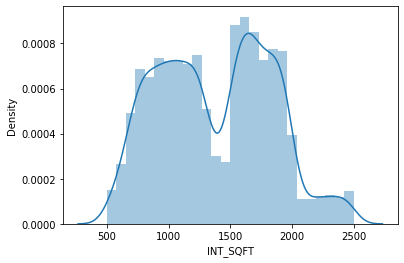

In [ ]:
sns.distplot(df.INT_SQFT)

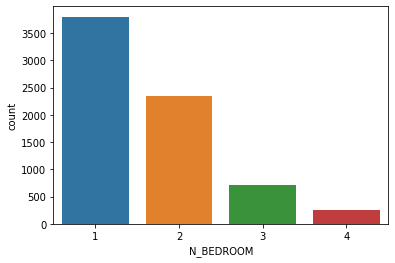

In [ ]:
# Count of bedrooms
sns.countplot(df.N_BEDROOM)

**Interpretation** - Highest number of bedroom count is for 1 bedroom

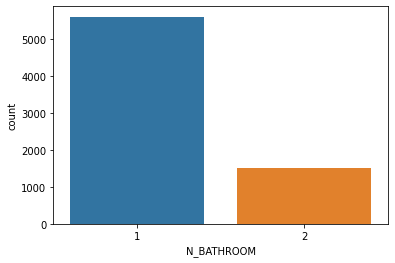

In [ ]:
# Count of Bathrooms
sns.countplot(df.N_BATHROOM)

**Interpretation** - From the data we see that the number of bathrooms in which count of 1 is more than 2. 

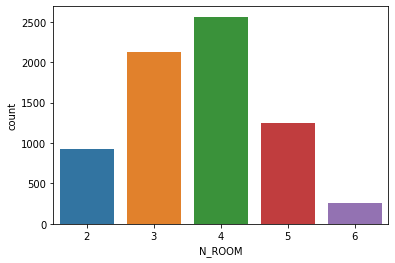

In [ ]:
# Count of number of rooms
sns.countplot(df.N_ROOM)

In [ ]:
value = df["SALE_COND"].value_counts()
name = df["SALE_COND"].unique()

fig3 = px.pie(df, values = value, names = name, color = value, title = "Distribution of condition of sale")
fig3

In [ ]:
value = df["PARK_FACIL"].value_counts()
name = df["PARK_FACIL"].unique()

fig4 = px.pie(df, values = value, names = name, color = value, title = "Distribution of Parking Facility")
fig4

In [ ]:
value = df["BUILDTYPE"].value_counts()
name = df["BUILDTYPE"].unique()

fig5 = px.pie(df, values = value, names = name, color = value, title = "Distribution of Build Type")
fig5

In [ ]:
value = df["UTILITY_AVAIL"].value_counts()
name = df["UTILITY_AVAIL"].unique()

fig6 = px.pie(df, values = value, names = name, color = value, title = "Distribution of Utility Avail")
fig6

In [ ]:
value = df["STREET"].value_counts()
name = df["STREET"].unique()

fig7 = px.pie(df, values = value, names = name, color = value, title = "Distribution of Street")
fig7

In [ ]:
value = df["MZZONE"].value_counts()
name = df["MZZONE"].unique()

fig8 = px.pie(df, values = value, names = name, color = value, title = "Distribution of MZ Zones")
fig8

**Feature vs** **Target** 

In [ ]:
x = pd.DataFrame(df.groupby("AREA")['Total_Price'].mean())
y = df["AREA"].unique()
y = sorted(y)

data = {"Area":y, "Average_Price": x['Total_Price']}
temp = pd.DataFrame(data)
temp.sort_values("Average_Price", inplace = True)

In [ ]:
fig9 = px.bar(temp, x = "Area", y = "Average_Price", color = "Area", title = "AREA vs Average Price")
fig9 

**Interpretation** - All the localities are in sorted order, as we can see there is a clear linear relationship here as it is almost like a straight line. 

In [ ]:
fig10 = px.scatter(df, x = "INT_SQFT", y = "Total_Price", color = "INT_SQFT", title = "SQ.FT vs Price")
fig10

**Interpretation** - From this scatter plot, we can see a linear pattern between the features SQ.FT vs the Total Price, so no transformation required. 

In [ ]:
fig11 = px.scatter(df, x = "DIST_MAINROAD", y = "Total_Price", color = "DIST_MAINROAD", title = "Distance from Main Road vs Price")
fig11

In [ ]:
a = [df.loc[(df.DIST_MAINROAD > i) & (df.DIST_MAINROAD < (i+25)),"Total_Price"].mean() for i in range(0,200,25)]
a 

[11413199.473105134,
 11361353.930365296,
 11368051.05399061,
 11217404.042505592,
 11344771.67157418,
 11607460.952996476,
 11588614.209273184,
 11519452.342581423]

Text(0.5, 1.0, 'DDist Mainroad vs Price')

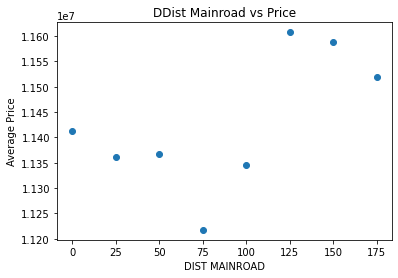

In [ ]:
plt.scatter(x = list(range(0,200,25)), y = a)
plt.xlabel('DIST MAINROAD')
plt.ylabel('Average Price')
plt.title('DDist Mainroad vs Price')

In [ ]:
df.corr()

,INT_SQFT,DIST_MAINROAD,N_BEDROOM,N_BATHROOM,N_ROOM,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,House_Age,Total_Price
INT_SQFT,1.000000,0.002022,0.786263,0.515290,0.951279,0.019850,-0.008337,0.008865,0.014025,-0.012610,0.620010
DIST_MAINROAD,0.002022,1.000000,-0.002723,0.001850,0.002301,0.002237,-0.029468,0.001554,-0.017313,-0.003559,0.018584
N_BEDROOM,0.786263,-0.002723,1.000000,0.755207,0.840209,0.014948,-0.007534,0.015752,0.014282,-0.045873,0.341300
N_BATHROOM,0.515290,0.001850,0.755207,1.000000,0.568541,0.013376,-0.012043,0.013191,0.007989,-0.020403,0.118533
N_ROOM,0.951279,0.002301,0.840209,0.568541,1.000000,0.016524,-0.007545,0.015072,0.015459,-0.033316,0.609345
QS_ROOMS,0.019850,0.002237,0.014948,0.013376,0.016524,1.000000,0.008828,0.007789,0.517741,0.019718,0.021888
QS_BATHROOM,-0.008337,-0.029468,-0.007534,-0.012043,-0.007545,0.008828,1.000000,-0.011745,0.551125,0.021700,-0.011122
QS_BEDROOM,0.008865,0.001554,0.015752,0.013191,0.015072,0.007789,-0.011745,1.000000,0.630447,-0.017971,0.019146
QS_OVERALL,0.014025,-0.017313,0.014282,0.007989,0.015459,0.517741,0.551125,0.630447,1.000000,0.012562,0.020792
House_Age,-0.012610,-0.003559,-0.045873,-0.020403,-0.033316,0.019718,0.021700,-0.017971,0.012562,1.000000,-0.119536


**Interpretation** - No relationship found between the Distance from Main Road feature and the target. There is no linear relationship(only flat line seen) found between Distance from Main Road feature and Total price feature. So, it is ideal to remove the feature Distance from Main Road as part of feature selection. 

In [ ]:
del df['DIST_MAINROAD']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   N_BEDROOM      7109 non-null   int64         
 4   N_BATHROOM     7109 non-null   int64         
 5   N_ROOM         7109 non-null   int64         
 6   SALE_COND      7109 non-null   object        
 7   PARK_FACIL     7109 non-null   object        
 8   DATE_BUILD     7109 non-null   datetime64[ns]
 9   BUILDTYPE      7109 non-null   object        
 10  UTILITY_AVAIL  7109 non-null   object        
 11  STREET         7109 non-null   object        
 12  MZZONE         7109 non-null   object        
 13  QS_ROOMS       7109 non-null   float64       
 14  QS_BATHROOM    7109 non-null   float64       
 15  QS_BEDROOM     7109 n

In [ ]:
df[['INT_SQFT','Total_Price']].corr()

,INT_SQFT,Total_Price
INT_SQFT,1.00000,0.62001
Total_Price,0.62001,1.00000


In [ ]:
x2 = pd.DataFrame(df.groupby("N_BEDROOM")['Total_Price'].mean())
y2 = df["N_BEDROOM"].unique()
y2 = sorted(y2)

data2 = {"N_BEDROOM":y2, "Average_Price": x2['Total_Price']}
temp2 = pd.DataFrame(data2)
temp2

,N_BEDROOM,Average_Price
N_BEDROOM,,
1,1,1.022734e+07
2,2,1.239016e+07
3,3,1.313775e+07
4,4,1.527924e+07


In [ ]:
fig13 = px.bar(temp2, x = "N_BEDROOM", y = "Average_Price", color = "N_BEDROOM", title = "Number of bedrooms vs Average Price")
fig13 

**Interpretation** - There is a clear linear relationship between Number of bedrooms and the target Average Price column. So, no transformation required. 

In [ ]:
x3 = pd.DataFrame(df.groupby("N_BATHROOM")['Total_Price'].mean())
y3 = df["N_BATHROOM"].unique()
y3 = sorted(y3)

data3 = {"N_BATHROOM":y3, "Average_Price": x3['Total_Price']}
temp3 = pd.DataFrame(data3)
temp3

,N_BATHROOM,Average_Price
N_BATHROOM,,
1,1,1.116952e+07
2,2,1.231133e+07


In [ ]:
fig14 = px.bar(temp3, x = "N_BATHROOM", y = "Average_Price", color = "N_BATHROOM", title = "Number of bathrooms vs Average Price")
fig14 

**Interpretation** - There is a clear linear relationship between Number of bathrooms and the target Average Price column. So, no transformation required. 

In [ ]:
x4 = pd.DataFrame(df.groupby("N_ROOM")['Total_Price'].mean())
y4 = df["N_ROOM"].unique()
y4 = sorted(y4)

data4 = {"N_ROOM":y4, "Average_Price": x4['Total_Price']}
temp4 = pd.DataFrame(data4)
temp4

,N_ROOM,Average_Price
N_ROOM,,
2,2,7.311581e+06
3,3,9.705458e+06
4,4,1.225463e+07
5,5,1.483657e+07
6,6,1.527924e+07


In [ ]:
fig15 = px.bar(temp4, x = "N_ROOM", y = "Average_Price", color = "N_ROOM", title = "Number of rooms vs Average Price")
fig15 

**Interpretation** - There is a clear linear relationship between Number of Rooms and the target Average Price column. So, no transformation required. 

In [ ]:
x5 = pd.DataFrame(df.groupby("SALE_COND")['Total_Price'].mean())
y5 = df["SALE_COND"].unique()
y5 = sorted(y5)

data5 = {"SALE_COND":y5, "Average_Price": x5['Total_Price']}
temp5 = pd.DataFrame(data5)
temp5.sort_values("Average_Price", inplace = True)

In [ ]:
fig16 = px.bar(temp5, x = "SALE_COND", y = "Average_Price", color = "SALE_COND", title = "Sale Condition vs Average Price")
fig16 

**Interpretation** - There is a clear linear relationship between Sale Condition and the target Average Price column. So, no transformation required. 

In [ ]:
x6 = pd.DataFrame(df.groupby("PARK_FACIL")['Total_Price'].mean())
y6 = df["PARK_FACIL"].unique()
y6 = sorted(y6)

data6 = {"PARK_FACIL":y6, "Average_Price": x6['Total_Price']}
temp6 = pd.DataFrame(data6)
temp6

,PARK_FACIL,Average_Price
PARK_FACIL,,
No,No,1.082803e+07
Yes,Yes,1.198708e+07


In [ ]:
fig17 = px.bar(temp6, x = "PARK_FACIL", y = "Average_Price", color = "PARK_FACIL", title = "Parking Facility vs Average Price")
fig17

**Interpretation** - There is a clear linear relationship between Parking 
Facility and the target Average Price column. So, no transformation required. 

In [ ]:
x7 = pd.DataFrame(df.groupby("BUILDTYPE")['Total_Price'].mean())
y7 = df["BUILDTYPE"].unique()
y7 = sorted(y7)

data7 = {"BUILDTYPE":y7, "Average_Price": x7['Total_Price']}
temp7 = pd.DataFrame(data7)
temp7.sort_values("Average_Price", inplace = True)

In [ ]:
fig18 = px.bar(temp7, x = "BUILDTYPE", y = "Average_Price", color = "BUILDTYPE", title = "Build Type vs Average Price")
fig18 

**Interpretation** - There is no linear relationship between BuildType and Average Price target column. So, transformation is required here. 

In [ ]:
x8 = pd.DataFrame(df.groupby("UTILITY_AVAIL")['Total_Price'].mean())
y8 = df["UTILITY_AVAIL"].unique()
y8 = sorted(y8)

data8 = {"UTILITY_AVAIL":y8, "Average_Price": x8['Total_Price']}
temp8 = pd.DataFrame(data8)
temp8.sort_values("Average_Price", inplace = True)

In [ ]:
fig19 = px.bar(temp8, x = "UTILITY_AVAIL", y = "Average_Price", color = "UTILITY_AVAIL", title = "Utility Avail vs Average Price")
fig19 

**Interpretation** - There is a clear linear relationship between Parking 
Facility and the target Average Price column. So, no transformation required.

In [ ]:
x9 = pd.DataFrame(df.groupby("STREET")['Total_Price'].mean())
y9 = df["STREET"].unique()
y9 = sorted(y9)

data9 = {"STREET":y9, "Average_Price": x9['Total_Price']}
temp9 = pd.DataFrame(data9)
temp9.sort_values("Average_Price", inplace = True)

In [ ]:
fig20 = px.bar(temp9, x = "STREET", y = "Average_Price", color = "STREET", title = "Street vs Average Price")
fig20

**Interpretation** - There is no linear relationship between Street and Average Price target column. So, transformation is required here. 

In [ ]:
x10 = pd.DataFrame(df.groupby("MZZONE")['Total_Price'].mean())
y10 = df["MZZONE"].unique()
y10 = sorted(y10)

data10 = {"MZZONE":y10, "Average_Price": x10['Total_Price']}
temp10 = pd.DataFrame(data10)
temp10

,MZZONE,Average_Price
MZZONE,,
A,A,7.660002e+06
C,C,8.457634e+06
I,I,9.170939e+06
RH,RH,1.156145e+07
RL,RL,1.231839e+07
RM,RM,1.298932e+07


In [ ]:
fig21 = px.bar(temp10, x = "MZZONE", y = "Average_Price", color = "MZZONE", title = "MZ Zones vs Average Price")
fig21

**Interpretation** - There is a clear linear relationship between MZ Zone and the target Average Price column. So, no transformation required.

In [ ]:
fig22 = px.scatter(df, x = "House_Age", y = "Total_Price", color = "House_Age", title = "House Age vs Price")
fig22

In [ ]:
df['House_Age'].max()

55

In [ ]:
a = [df.loc[(df.House_Age > i) & (df.House_Age < (i+10)),"Total_Price"].mean() for i in range(0,55,11)]
a 

[11844634.765482234,
 11726661.614192009,
 11412639.949622165,
 10994781.917609047,
 9416090.215633424]

Text(0.5, 1.0, 'House Age vs Price')

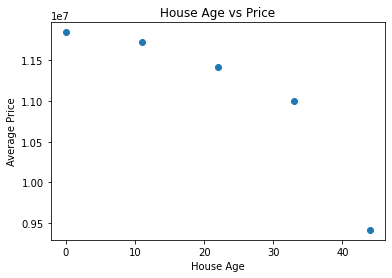

In [ ]:
plt.scatter(x = list(range(0,55,11)), y = a)
plt.xlabel('House Age')
plt.ylabel('Average Price')
plt.title('House Age vs Price')

In [ ]:
df[['House_Age','Total_Price']].corr()

,House_Age,Total_Price
House_Age,1.000000,-0.119536
Total_Price,-0.119536,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   AREA           7109 non-null   object        
 1   INT_SQFT       7109 non-null   int64         
 2   DATE_SALE      7109 non-null   datetime64[ns]
 3   N_BEDROOM      7109 non-null   int64         
 4   N_BATHROOM     7109 non-null   int64         
 5   N_ROOM         7109 non-null   int64         
 6   SALE_COND      7109 non-null   object        
 7   PARK_FACIL     7109 non-null   object        
 8   DATE_BUILD     7109 non-null   datetime64[ns]
 9   BUILDTYPE      7109 non-null   object        
 10  UTILITY_AVAIL  7109 non-null   object        
 11  STREET         7109 non-null   object        
 12  MZZONE         7109 non-null   object        
 13  QS_ROOMS       7109 non-null   float64       
 14  QS_BATHROOM    7109 non-null   float64       
 15  QS_BEDROOM     7109 n

# **Encoding**

In [ ]:
df = pd.get_dummies(df, columns=['BUILDTYPE'])
df

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,...,MZZONE,QS_ROOMS,QS_BATHROOM,QS_BEDROOM,QS_OVERALL,House_Age,Total_Price,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others
0,Karapakkam,1004,2011-04-05,1,1,3,AbNormal,Yes,1967-05-15,All Pub,...,A,4.0,3.9,4.9,4.330,44,8124400,1,0,0
1,Anna Nagar,1986,2006-12-19,2,1,5,AbNormal,No,1995-12-22,All Pub,...,RH,4.9,4.2,2.5,3.765,11,22781941,1,0,0
2,Adyar,909,2012-04-02,1,1,3,AbNormal,Yes,1992-09-02,ELO,...,RL,4.1,3.8,2.2,3.090,20,13672408,1,0,0
3,Velachery,1855,2010-03-13,3,2,5,Family,No,1988-03-18,NoSewr,...,I,4.7,3.9,3.6,4.010,22,10063653,0,0,1
4,Karapakkam,1226,2009-05-10,1,1,3,AbNormal,Yes,1979-10-13,All Pub,...,C,3.0,2.5,4.1,3.290,30,7717313,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,1,1,2,AdjLand,No,1962-01-15,ELO,...,RM,3.0,2.2,2.4,2.520,49,5668827,0,0,1
7105,Velachery,1897,2004-08-04,3,2,5,Family,Yes,1995-11-04,NoSewr,...,RH,3.6,4.5,3.3,3.920,9,11370222,0,0,1
7106,Velachery,1614,2006-08-25,2,1,4,Normal Sale,No,1978-01-09,NoSewr,...,I,4.3,4.2,2.9,3.840,28,8835792,0,1,0
7107,Karapakkam,787,2009-03-08,1,1,2,Partial,Yes,1977-11-08,ELO,...,RL,4.6,3.8,4.1,4.160,32,9051448,1,0,0


In [ ]:
df = pd.get_dummies(df, columns=['STREET'])
df

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,...,QS_BEDROOM,QS_OVERALL,House_Age,Total_Price,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,STREET_Gravel,STREET_No Access,STREET_Paved
0,Karapakkam,1004,2011-04-05,1,1,3,AbNormal,Yes,1967-05-15,All Pub,...,4.9,4.330,44,8124400,1,0,0,0,0,1
1,Anna Nagar,1986,2006-12-19,2,1,5,AbNormal,No,1995-12-22,All Pub,...,2.5,3.765,11,22781941,1,0,0,1,0,0
2,Adyar,909,2012-04-02,1,1,3,AbNormal,Yes,1992-09-02,ELO,...,2.2,3.090,20,13672408,1,0,0,1,0,0
3,Velachery,1855,2010-03-13,3,2,5,Family,No,1988-03-18,NoSewr,...,3.6,4.010,22,10063653,0,0,1,0,0,1
4,Karapakkam,1226,2009-05-10,1,1,3,AbNormal,Yes,1979-10-13,All Pub,...,4.1,3.290,30,7717313,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,Karapakkam,598,2011-03-01,1,1,2,AdjLand,No,1962-01-15,ELO,...,2.4,2.520,49,5668827,0,0,1,0,1,0
7105,Velachery,1897,2004-08-04,3,2,5,Family,Yes,1995-11-04,NoSewr,...,3.3,3.920,9,11370222,0,0,1,0,1,0
7106,Velachery,1614,2006-08-25,2,1,4,Normal Sale,No,1978-01-09,NoSewr,...,2.9,3.840,28,8835792,0,1,0,1,0,0
7107,Karapakkam,787,2009-03-08,1,1,2,Partial,Yes,1977-11-08,ELO,...,4.1,4.160,32,9051448,1,0,0,0,0,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() 

df['AREA'] = df['AREA'].map({"Karapakkam":1, "Adyar":2, "Chrompet":3, "Velachery":4, "KK Nagar":5, "Anna Nagar":6, "T Nagar":7})

In [ ]:
df

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,...,QS_BEDROOM,QS_OVERALL,House_Age,Total_Price,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,STREET_Gravel,STREET_No Access,STREET_Paved
0,1,1004,2011-04-05,1,1,3,AbNormal,Yes,1967-05-15,All Pub,...,4.9,4.330,44,8124400,1,0,0,0,0,1
1,6,1986,2006-12-19,2,1,5,AbNormal,No,1995-12-22,All Pub,...,2.5,3.765,11,22781941,1,0,0,1,0,0
2,2,909,2012-04-02,1,1,3,AbNormal,Yes,1992-09-02,ELO,...,2.2,3.090,20,13672408,1,0,0,1,0,0
3,4,1855,2010-03-13,3,2,5,Family,No,1988-03-18,NoSewr,...,3.6,4.010,22,10063653,0,0,1,0,0,1
4,1,1226,2009-05-10,1,1,3,AbNormal,Yes,1979-10-13,All Pub,...,4.1,3.290,30,7717313,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,2011-03-01,1,1,2,AdjLand,No,1962-01-15,ELO,...,2.4,2.520,49,5668827,0,0,1,0,1,0
7105,4,1897,2004-08-04,3,2,5,Family,Yes,1995-11-04,NoSewr,...,3.3,3.920,9,11370222,0,0,1,0,1,0
7106,4,1614,2006-08-25,2,1,4,Normal Sale,No,1978-01-09,NoSewr,...,2.9,3.840,28,8835792,0,1,0,1,0,0
7107,1,787,2009-03-08,1,1,2,Partial,Yes,1977-11-08,ELO,...,4.1,4.160,32,9051448,1,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AREA                  7109 non-null   int64         
 1   INT_SQFT              7109 non-null   int64         
 2   DATE_SALE             7109 non-null   datetime64[ns]
 3   N_BEDROOM             7109 non-null   int64         
 4   N_BATHROOM            7109 non-null   int64         
 5   N_ROOM                7109 non-null   int64         
 6   SALE_COND             7109 non-null   object        
 7   PARK_FACIL            7109 non-null   object        
 8   DATE_BUILD            7109 non-null   datetime64[ns]
 9   UTILITY_AVAIL         7109 non-null   object        
 10  MZZONE                7109 non-null   object        
 11  QS_ROOMS              7109 non-null   float64       
 12  QS_BATHROOM           7109 non-null   float64       
 13  QS_BEDROOM        

In [ ]:
le = LabelEncoder() 

df['UTILITY_AVAIL'] = df['UTILITY_AVAIL'].map({"ELO":1, "NoSewr":2, "All Pub":3})

In [ ]:
df

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,...,QS_BEDROOM,QS_OVERALL,House_Age,Total_Price,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,STREET_Gravel,STREET_No Access,STREET_Paved
0,1,1004,2011-04-05,1,1,3,AbNormal,Yes,1967-05-15,3,...,4.9,4.330,44,8124400,1,0,0,0,0,1
1,6,1986,2006-12-19,2,1,5,AbNormal,No,1995-12-22,3,...,2.5,3.765,11,22781941,1,0,0,1,0,0
2,2,909,2012-04-02,1,1,3,AbNormal,Yes,1992-09-02,1,...,2.2,3.090,20,13672408,1,0,0,1,0,0
3,4,1855,2010-03-13,3,2,5,Family,No,1988-03-18,2,...,3.6,4.010,22,10063653,0,0,1,0,0,1
4,1,1226,2009-05-10,1,1,3,AbNormal,Yes,1979-10-13,3,...,4.1,3.290,30,7717313,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,2011-03-01,1,1,2,AdjLand,No,1962-01-15,1,...,2.4,2.520,49,5668827,0,0,1,0,1,0
7105,4,1897,2004-08-04,3,2,5,Family,Yes,1995-11-04,2,...,3.3,3.920,9,11370222,0,0,1,0,1,0
7106,4,1614,2006-08-25,2,1,4,Normal Sale,No,1978-01-09,2,...,2.9,3.840,28,8835792,0,1,0,1,0,0
7107,1,787,2009-03-08,1,1,2,Partial,Yes,1977-11-08,1,...,4.1,4.160,32,9051448,1,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AREA                  7109 non-null   int64         
 1   INT_SQFT              7109 non-null   int64         
 2   DATE_SALE             7109 non-null   datetime64[ns]
 3   N_BEDROOM             7109 non-null   int64         
 4   N_BATHROOM            7109 non-null   int64         
 5   N_ROOM                7109 non-null   int64         
 6   SALE_COND             7109 non-null   object        
 7   PARK_FACIL            7109 non-null   object        
 8   DATE_BUILD            7109 non-null   datetime64[ns]
 9   UTILITY_AVAIL         7109 non-null   int64         
 10  MZZONE                7109 non-null   object        
 11  QS_ROOMS              7109 non-null   float64       
 12  QS_BATHROOM           7109 non-null   float64       
 13  QS_BEDROOM        

In [ ]:
le = LabelEncoder() 

df['SALE_COND'] = df['SALE_COND'].map({"Partial":1, "Family":2, "AbNormal":3, "Normal Sale":4, "AdjLand":5})

In [ ]:
df

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,...,QS_BEDROOM,QS_OVERALL,House_Age,Total_Price,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,STREET_Gravel,STREET_No Access,STREET_Paved
0,1,1004,2011-04-05,1,1,3,3,Yes,1967-05-15,3,...,4.9,4.330,44,8124400,1,0,0,0,0,1
1,6,1986,2006-12-19,2,1,5,3,No,1995-12-22,3,...,2.5,3.765,11,22781941,1,0,0,1,0,0
2,2,909,2012-04-02,1,1,3,3,Yes,1992-09-02,1,...,2.2,3.090,20,13672408,1,0,0,1,0,0
3,4,1855,2010-03-13,3,2,5,2,No,1988-03-18,2,...,3.6,4.010,22,10063653,0,0,1,0,0,1
4,1,1226,2009-05-10,1,1,3,3,Yes,1979-10-13,3,...,4.1,3.290,30,7717313,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,2011-03-01,1,1,2,5,No,1962-01-15,1,...,2.4,2.520,49,5668827,0,0,1,0,1,0
7105,4,1897,2004-08-04,3,2,5,2,Yes,1995-11-04,2,...,3.3,3.920,9,11370222,0,0,1,0,1,0
7106,4,1614,2006-08-25,2,1,4,4,No,1978-01-09,2,...,2.9,3.840,28,8835792,0,1,0,1,0,0
7107,1,787,2009-03-08,1,1,2,1,Yes,1977-11-08,1,...,4.1,4.160,32,9051448,1,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AREA                  7109 non-null   int64         
 1   INT_SQFT              7109 non-null   int64         
 2   DATE_SALE             7109 non-null   datetime64[ns]
 3   N_BEDROOM             7109 non-null   int64         
 4   N_BATHROOM            7109 non-null   int64         
 5   N_ROOM                7109 non-null   int64         
 6   SALE_COND             7109 non-null   int64         
 7   PARK_FACIL            7109 non-null   object        
 8   DATE_BUILD            7109 non-null   datetime64[ns]
 9   UTILITY_AVAIL         7109 non-null   int64         
 10  MZZONE                7109 non-null   object        
 11  QS_ROOMS              7109 non-null   float64       
 12  QS_BATHROOM           7109 non-null   float64       
 13  QS_BEDROOM        

In [ ]:
le = LabelEncoder() 

df['PARK_FACIL'] = df['PARK_FACIL'].map({"No":1, "Yes":2})

In [ ]:
df

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,...,QS_BEDROOM,QS_OVERALL,House_Age,Total_Price,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,STREET_Gravel,STREET_No Access,STREET_Paved
0,1,1004,2011-04-05,1,1,3,3,2,1967-05-15,3,...,4.9,4.330,44,8124400,1,0,0,0,0,1
1,6,1986,2006-12-19,2,1,5,3,1,1995-12-22,3,...,2.5,3.765,11,22781941,1,0,0,1,0,0
2,2,909,2012-04-02,1,1,3,3,2,1992-09-02,1,...,2.2,3.090,20,13672408,1,0,0,1,0,0
3,4,1855,2010-03-13,3,2,5,2,1,1988-03-18,2,...,3.6,4.010,22,10063653,0,0,1,0,0,1
4,1,1226,2009-05-10,1,1,3,3,2,1979-10-13,3,...,4.1,3.290,30,7717313,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,2011-03-01,1,1,2,5,1,1962-01-15,1,...,2.4,2.520,49,5668827,0,0,1,0,1,0
7105,4,1897,2004-08-04,3,2,5,2,2,1995-11-04,2,...,3.3,3.920,9,11370222,0,0,1,0,1,0
7106,4,1614,2006-08-25,2,1,4,4,1,1978-01-09,2,...,2.9,3.840,28,8835792,0,1,0,1,0,0
7107,1,787,2009-03-08,1,1,2,1,2,1977-11-08,1,...,4.1,4.160,32,9051448,1,0,0,0,0,1


In [ ]:
le = LabelEncoder() 

df['MZZONE'] = df['MZZONE'].map({"A":1, "C":2, "I":3, "RH":4, "RL":5, "RM":6})

In [ ]:
df

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,...,QS_BEDROOM,QS_OVERALL,House_Age,Total_Price,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,STREET_Gravel,STREET_No Access,STREET_Paved
0,1,1004,2011-04-05,1,1,3,3,2,1967-05-15,3,...,4.9,4.330,44,8124400,1,0,0,0,0,1
1,6,1986,2006-12-19,2,1,5,3,1,1995-12-22,3,...,2.5,3.765,11,22781941,1,0,0,1,0,0
2,2,909,2012-04-02,1,1,3,3,2,1992-09-02,1,...,2.2,3.090,20,13672408,1,0,0,1,0,0
3,4,1855,2010-03-13,3,2,5,2,1,1988-03-18,2,...,3.6,4.010,22,10063653,0,0,1,0,0,1
4,1,1226,2009-05-10,1,1,3,3,2,1979-10-13,3,...,4.1,3.290,30,7717313,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,2011-03-01,1,1,2,5,1,1962-01-15,1,...,2.4,2.520,49,5668827,0,0,1,0,1,0
7105,4,1897,2004-08-04,3,2,5,2,2,1995-11-04,2,...,3.3,3.920,9,11370222,0,0,1,0,1,0
7106,4,1614,2006-08-25,2,1,4,4,1,1978-01-09,2,...,2.9,3.840,28,8835792,0,1,0,1,0,0
7107,1,787,2009-03-08,1,1,2,1,2,1977-11-08,1,...,4.1,4.160,32,9051448,1,0,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AREA                  7109 non-null   int64         
 1   INT_SQFT              7109 non-null   int64         
 2   DATE_SALE             7109 non-null   datetime64[ns]
 3   N_BEDROOM             7109 non-null   int64         
 4   N_BATHROOM            7109 non-null   int64         
 5   N_ROOM                7109 non-null   int64         
 6   SALE_COND             7109 non-null   int64         
 7   PARK_FACIL            7109 non-null   int64         
 8   DATE_BUILD            7109 non-null   datetime64[ns]
 9   UTILITY_AVAIL         7109 non-null   int64         
 10  MZZONE                7109 non-null   int64         
 11  QS_ROOMS              7109 non-null   float64       
 12  QS_BATHROOM           7109 non-null   float64       
 13  QS_BEDROOM        

# Outlier Detection

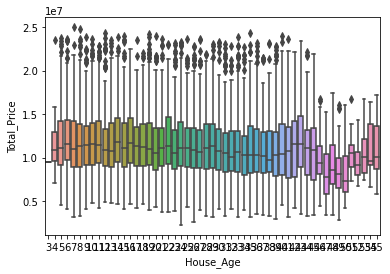

In [ ]:
sns.boxplot(x = 'House_Age', y = 'Total_Price', data = df)

In [ ]:
df['Total_Price'].max()

24969043

**Interpretation** - The maximum price in this Total_Price column is 2.49 Cr,  which is a reasonable upper limit value of an house Price in Chennai. So, it is not an outlier by any chance. 

In [ ]:
df['INT_SQFT'].max()

2500

In [ ]:
df['N_ROOM'].max()

6

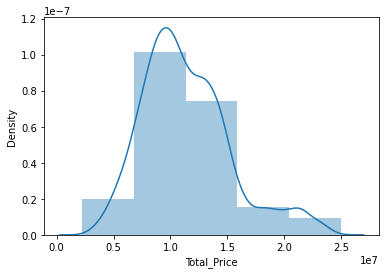

In [ ]:
sns.distplot(df['Total_Price'], bins = 5)

In [ ]:
df['Total_Price'].min()

2253935

In [ ]:
df.describe()

,AREA,INT_SQFT,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,UTILITY_AVAIL,MZZONE,QS_ROOMS,...,QS_BEDROOM,QS_OVERALL,House_Age,Total_Price,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,STREET_Gravel,STREET_No Access,STREET_Paved
count,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,...,7109.000000,7061.000000,7109.000000,7.109000e+03,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000,7109.000000
mean,3.539738,1382.073006,1.636939,1.213110,3.688704,3.004501,1.504572,2.051343,4.317344,3.517471,...,3.485300,3.503254,24.276270,1.141285e+07,0.327613,0.343790,0.328598,0.354480,0.283725,0.361795
std,1.846837,457.410902,0.802881,0.409534,1.019099,1.419073,0.500014,0.690626,1.498831,0.891972,...,0.887266,0.527223,12.334164,3.944957e+06,0.469376,0.475005,0.469736,0.478389,0.450837,0.480554
min,1.000000,500.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,2.000000,2.000000,3.000000,2.253935e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,993.000000,1.000000,1.000000,3.000000,2.000000,1.000000,2.000000,4.000000,2.700000,...,2.700000,3.130000,14.000000,8.645792e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,1373.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,5.000000,3.500000,...,3.500000,3.500000,23.000000,1.081953e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.000000,1744.000000,2.000000,1.000000,4.000000,4.000000,2.000000,3.000000,6.000000,4.300000,...,4.300000,3.890000,34.000000,1.361393e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,7.000000,2500.000000,4.000000,2.000000,6.000000,5.000000,2.000000,3.000000,6.000000,5.000000,...,5.000000,4.970000,55.000000,2.496904e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
df['QS_ROOMS'].astype('int64')

0       4
1       4
2       4
3       4
4       3
       ..
7104    3
7105    3
7106    4
7107    4
7108    3
Name: QS_ROOMS, Length: 7109, dtype: int64

In [ ]:
df['QS_BATHROOM'] = df['QS_BATHROOM'].apply(int)

In [ ]:
df['QS_BEDROOM'] = df['QS_BEDROOM'].astype('int64')

In [ ]:
df

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,...,QS_BEDROOM,QS_OVERALL,House_Age,Total_Price,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,STREET_Gravel,STREET_No Access,STREET_Paved
0,1,1004,2011-04-05,1,1,3,3,2,1967-05-15,3,...,4,4.330,44,8124400,1,0,0,0,0,1
1,6,1986,2006-12-19,2,1,5,3,1,1995-12-22,3,...,2,3.765,11,22781941,1,0,0,1,0,0
2,2,909,2012-04-02,1,1,3,3,2,1992-09-02,1,...,2,3.090,20,13672408,1,0,0,1,0,0
3,4,1855,2010-03-13,3,2,5,2,1,1988-03-18,2,...,3,4.010,22,10063653,0,0,1,0,0,1
4,1,1226,2009-05-10,1,1,3,3,2,1979-10-13,3,...,4,3.290,30,7717313,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,2011-03-01,1,1,2,5,1,1962-01-15,1,...,2,2.520,49,5668827,0,0,1,0,1,0
7105,4,1897,2004-08-04,3,2,5,2,2,1995-11-04,2,...,3,3.920,9,11370222,0,0,1,0,1,0
7106,4,1614,2006-08-25,2,1,4,4,1,1978-01-09,2,...,2,3.840,28,8835792,0,1,0,1,0,0
7107,1,787,2009-03-08,1,1,2,1,2,1977-11-08,1,...,4,4.160,32,9051448,1,0,0,0,0,1


In [ ]:
df['QS_BATHROOM']

0       3
1       4
2       3
3       3
4       2
       ..
7104    2
7105    4
7106    4
7107    3
7108    3
Name: QS_BATHROOM, Length: 7109, dtype: int64

In [ ]:
df['QS_OVERALL'] = df['QS_OVERALL'].fillna(df['QS_OVERALL'].mean())

In [ ]:
df.isnull().sum()

AREA                    0
INT_SQFT                0
DATE_SALE               0
N_BEDROOM               0
N_BATHROOM              0
N_ROOM                  0
SALE_COND               0
PARK_FACIL              0
DATE_BUILD              0
UTILITY_AVAIL           0
MZZONE                  0
QS_ROOMS                0
QS_BATHROOM             0
QS_BEDROOM              0
QS_OVERALL              0
House_Age               0
Total_Price             0
BUILDTYPE_Commercial    0
BUILDTYPE_House         0
BUILDTYPE_Others        0
STREET_Gravel           0
STREET_No Access        0
STREET_Paved            0
dtype: int64

In [ ]:
df['QS_OVERALL'] = df['QS_OVERALL'].astype('int64')

In [ ]:
df['QS_OVERALL']

0       4
1       3
2       3
3       4
4       3
       ..
7104    2
7105    3
7106    3
7107    4
7108    3
Name: QS_OVERALL, Length: 7109, dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AREA                  7109 non-null   int64         
 1   INT_SQFT              7109 non-null   int64         
 2   DATE_SALE             7109 non-null   datetime64[ns]
 3   N_BEDROOM             7109 non-null   int64         
 4   N_BATHROOM            7109 non-null   int64         
 5   N_ROOM                7109 non-null   int64         
 6   SALE_COND             7109 non-null   int64         
 7   PARK_FACIL            7109 non-null   int64         
 8   DATE_BUILD            7109 non-null   datetime64[ns]
 9   UTILITY_AVAIL         7109 non-null   int64         
 10  MZZONE                7109 non-null   int64         
 11  QS_ROOMS              7109 non-null   float64       
 12  QS_BATHROOM           7109 non-null   int64         
 13  QS_BEDROOM        

In [ ]:
df['QS_ROOMS'] = df['QS_ROOMS'].astype('int64')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AREA                  7109 non-null   int64         
 1   INT_SQFT              7109 non-null   int64         
 2   DATE_SALE             7109 non-null   datetime64[ns]
 3   N_BEDROOM             7109 non-null   int64         
 4   N_BATHROOM            7109 non-null   int64         
 5   N_ROOM                7109 non-null   int64         
 6   SALE_COND             7109 non-null   int64         
 7   PARK_FACIL            7109 non-null   int64         
 8   DATE_BUILD            7109 non-null   datetime64[ns]
 9   UTILITY_AVAIL         7109 non-null   int64         
 10  MZZONE                7109 non-null   int64         
 11  QS_ROOMS              7109 non-null   int64         
 12  QS_BATHROOM           7109 non-null   int64         
 13  QS_BEDROOM        

In [ ]:
df

,AREA,INT_SQFT,DATE_SALE,N_BEDROOM,N_BATHROOM,N_ROOM,SALE_COND,PARK_FACIL,DATE_BUILD,UTILITY_AVAIL,...,QS_BEDROOM,QS_OVERALL,House_Age,Total_Price,BUILDTYPE_Commercial,BUILDTYPE_House,BUILDTYPE_Others,STREET_Gravel,STREET_No Access,STREET_Paved
0,1,1004,2011-04-05,1,1,3,3,2,1967-05-15,3,...,4,4,44,8124400,1,0,0,0,0,1
1,6,1986,2006-12-19,2,1,5,3,1,1995-12-22,3,...,2,3,11,22781941,1,0,0,1,0,0
2,2,909,2012-04-02,1,1,3,3,2,1992-09-02,1,...,2,3,20,13672408,1,0,0,1,0,0
3,4,1855,2010-03-13,3,2,5,2,1,1988-03-18,2,...,3,4,22,10063653,0,0,1,0,0,1
4,1,1226,2009-05-10,1,1,3,3,2,1979-10-13,3,...,4,3,30,7717313,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7104,1,598,2011-03-01,1,1,2,5,1,1962-01-15,1,...,2,2,49,5668827,0,0,1,0,1,0
7105,4,1897,2004-08-04,3,2,5,2,2,1995-11-04,2,...,3,3,9,11370222,0,0,1,0,1,0
7106,4,1614,2006-08-25,2,1,4,4,1,1978-01-09,2,...,2,3,28,8835792,0,1,0,1,0,0
7107,1,787,2009-03-08,1,1,2,1,2,1977-11-08,1,...,4,4,32,9051448,1,0,0,0,0,1


In [ ]:
df[['QS_ROOMS','Total_Price']].corr()

,QS_ROOMS,Total_Price
QS_ROOMS,1.000000,0.016012
Total_Price,0.016012,1.000000


In [ ]:
df[['QS_BATHROOM','Total_Price']].corr()

,QS_BATHROOM,Total_Price
QS_BATHROOM,1.000000,-0.019302
Total_Price,-0.019302,1.000000


In [ ]:
df[['QS_BEDROOM','Total_Price']].corr()

,QS_BEDROOM,Total_Price
QS_BEDROOM,1.000000,0.015442
Total_Price,0.015442,1.000000


In [ ]:
df[['QS_OVERALL','Total_Price']].corr()

,QS_OVERALL,Total_Price
QS_OVERALL,1.000000,0.012608
Total_Price,0.012608,1.000000


In [ ]:
df['DATE_SALE'] = pd.to_numeric(pd.to_datetime(df['DATE_SALE']))
df['DATE_BUILD'] = pd.to_numeric(pd.to_datetime(df['DATE_BUILD']))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   AREA                  7109 non-null   int64
 1   INT_SQFT              7109 non-null   int64
 2   DATE_SALE             7109 non-null   int64
 3   N_BEDROOM             7109 non-null   int64
 4   N_BATHROOM            7109 non-null   int64
 5   N_ROOM                7109 non-null   int64
 6   SALE_COND             7109 non-null   int64
 7   PARK_FACIL            7109 non-null   int64
 8   DATE_BUILD            7109 non-null   int64
 9   UTILITY_AVAIL         7109 non-null   int64
 10  MZZONE                7109 non-null   int64
 11  QS_ROOMS              7109 non-null   int64
 12  QS_BATHROOM           7109 non-null   int64
 13  QS_BEDROOM            7109 non-null   int64
 14  QS_OVERALL            7109 non-null   int64
 15  House_Age             7109 non-null   int64
 16  Total_

# Split and Scale

In [ ]:
x = df[['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL','DATE_BUILD','UTILITY_AVAIL','MZZONE','QS_ROOMS','QS_BATHROOM',
       'QS_BEDROOM','QS_OVERALL','House_Age','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others','STREET_Gravel','STREET_No Access','STREET_Paved']].values #array of features
y = df['Total_Price'].values #array of targets

In [ ]:
y

array([ 8124400, 22781941, 13672408, ...,  8835792,  9051448, 10405469])

In [ ]:
x

array([[                  1,                1004, 1301961600000000000,
        ...,                   0,                   0,
                          1],
       [                  6,                1986, 1166486400000000000,
        ...,                   1,                   0,
                          0],
       [                  2,                 909, 1333324800000000000,
        ...,                   1,                   0,
                          0],
       ...,
       [                  4,                1614, 1156464000000000000,
        ...,                   1,                   0,
                          0],
       [                  1,                 787, 1236470400000000000,
        ...,                   0,                   0,
                          1],
       [                  4,                1896, 1121212800000000000,
        ...,                   0,                   0,
                          1]])

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 5)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x_train, y_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Model Training

**Linear Regression**

In [ ]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train_scaled,y_train)

LinearRegression()

In [ ]:
coeff_df = pd.DataFrame(regressor.coef_,['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL','DATE_BUILD','UTILITY_AVAIL','MZZONE','QS_ROOMS','QS_BATHROOM',
       'QS_BEDROOM','QS_OVERALL','House_Age','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others','STREET_Gravel','STREET_No Access','STREET_Paved'], columns=['Coefficient'])
coeff_df

,Coefficient
AREA,1.063194e+06
INT_SQFT,8.014642e+05
DATE_SALE,2.453834e+04
N_BEDROOM,-1.306121e+06
N_BATHROOM,1.144408e+05
N_ROOM,1.764822e+06
SALE_COND,2.300024e+05
PARK_FACIL,5.521449e+05
DATE_BUILD,-2.226657e+05
UTILITY_AVAIL,6.050170e+04


In [ ]:
regressor.intercept_ # c 

11391711.763660884

In [ ]:
y_pred=regressor.predict(x_test_scaled)
print(y_test,y_pred)

[10409495 14850662 14265012 ...  6812501  9706779 15468469] [11665695.76366088 15001055.76366088 15319903.76366088 ...
  6951135.76366088  8921567.76366088 16207327.76366088]


In [ ]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,10409495,1.166570e+07
1,14850662,1.500106e+07
2,14265012,1.531990e+07
3,14653003,1.482224e+07
4,7804245,6.625248e+06
...,...,...
1417,12595671,1.270538e+07
1418,14274473,1.463587e+07
1419,6812501,6.951136e+06
1420,9706779,8.921568e+06


In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred),metrics.mean_squared_error(y_test,y_pred),metrics.r2_score(y_test,y_pred))

792666.792497635 1114631372472.7334 0.9307238530784802


**Decision Tree Regressor**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Instantiate dt
dt = DecisionTreeRegressor()

# Fit dt to the training set
dt.fit(x_train_scaled,y_train)
y_pred_dt=dt.predict(x_test_scaled)
print(y_test,y_pred_dt)

[10409495 14850662 14265012 ...  6812501  9706779 15468469] [10264534. 14793008. 13214792. ...  7509706. 10477193. 16015764.]


In [ ]:
df2 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_dt})
df2

,Actual,Predicted
0,10409495,10264534.0
1,14850662,14793008.0
2,14265012,13214792.0
3,14653003,14811539.0
4,7804245,7628762.0
...,...,...
1417,12595671,13452964.0
1418,14274473,13755541.0
1419,6812501,7509706.0
1420,9706779,10477193.0


In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred_dt),metrics.mean_squared_error(y_test,y_pred_dt),metrics.r2_score(y_test,y_pred_dt))

568714.5928270043 515171671182.6097 0.9679812454018071


**Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(max_depth = 5, n_estimators = 100)
model.fit(x_train_scaled, y_train)
y_pred_rf=model.predict(x_test_scaled)
print(y_test,y_pred_rf)

[10409495 14850662 14265012 ...  6812501  9706779 15468469] [10811153.73602712 13396696.74112675 13219526.53572701 ...
  6910967.56695357  9711452.10887617 13541877.83476264]


In [ ]:
from sklearn import metrics
print(metrics.mean_absolute_error(y_test,y_pred_rf),metrics.mean_squared_error(y_test,y_pred_rf),metrics.r2_score(y_test,y_pred_rf))

855120.1481350283 1124589754944.986 0.9301049234625678


**Gradient Boosting Regressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
for kr in [0.01,0.05,0.1,0.3,0.5,0.8,1]:
  model2= GradientBoostingRegressor(learning_rate=kr)
  model2.fit(x_train_scaled, y_train)
  print("Learning rate : ", kr, " Train score : ", model2.score(x_train_scaled,y_train), " Test score : ", model2.score(x_test_scaled,y_test))

Learning rate :  0.01  Train score :  0.7431321044372948  Test score :  0.736878433009533
Learning rate :  0.05  Train score :  0.9743470031256869  Test score :  0.9727850405732553
Learning rate :  0.1  Train score :  0.991704703625744  Test score :  0.9907105573026962
Learning rate :  0.3  Train score :  0.9967076362022042  Test score :  0.9958494525157454
Learning rate :  0.5  Train score :  0.9973026883651034  Test score :  0.9965387869927155
Learning rate :  0.8  Train score :  0.9977292450084616  Test score :  0.9963853276596534
Learning rate :  1  Train score :  0.9976759290886014  Test score :  0.9957180276875974


**XG Boost Regressor**

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
import numpy as np
for sr in [0.01,0.02,0.03,0.04,0.05,0.1,0.11,0.12,0.13,0.14,0.15,0.2,0.5,0.7,1]:
  model3 = xgb.XGBRegressor(learning_rate = sr, n_estimators=100, verbosity = 0) # initialise the model
  model3.fit(x_train_scaled,y_train) #train the model
  model3.score(x_test_scaled, y_test) # scoring the model - r2 squared
  print("Learning rate : ", sr, " Train score : ", model3.score(x_train_scaled,y_train), " Cross-Val score : ", np.mean(cross_val_score(model3, x_train_scaled, y_train, cv=10)))

Learning rate :  0.01  Train score :  -0.3882462369397506  Cross-Val score :  -0.3937901384650542
Learning rate :  0.02  Train score :  0.7450494849171245  Cross-Val score :  0.7417646523960775
Learning rate :  0.03  Train score :  0.9242176122950916  Cross-Val score :  0.9215991467264335
Learning rate :  0.04  Train score :  0.9618060847383494  Cross-Val score :  0.9597438398550564
Learning rate :  0.05  Train score :  0.9743665619812029  Cross-Val score :  0.9719328066152654
Learning rate :  0.1  Train score :  0.9916845082208874  Cross-Val score :  0.9899859218200779
Learning rate :  0.11  Train score :  0.9923999855936312  Cross-Val score :  0.9913581346678682
Learning rate :  0.12  Train score :  0.993757315268822  Cross-Val score :  0.9922266595595568
Learning rate :  0.13  Train score :  0.9947483747271822  Cross-Val score :  0.9930170011405121
Learning rate :  0.14  Train score :  0.99507066043084  Cross-Val score :  0.993576745928482
Learning rate :  0.15  Train score :  0.995

In [ ]:
model4 = xgb.XGBRegressor(learning_rate = 0.5, n_estimators=100, verbosity = 0)
model4.fit(x_train_scaled,y_train) #train the model
model4.score(x_test_scaled, y_test) # scoring the model - r2 squared

0.9962180763191065

**Select the most influential feature**

In [ ]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=10, step=1)
selector = selector.fit(x_train_scaled, y_train)
list(zip(['AREA', 'INT_SQFT', 'DATE_SALE', 'N_BEDROOM', 'N_BATHROOM', 'N_ROOM', 'SALE_COND', 'PARK_FACIL','DATE_BUILD','UTILITY_AVAIL','MZZONE','QS_ROOMS','QS_BATHROOM',
       'QS_BEDROOM','QS_OVERALL','House_Age','BUILDTYPE_Commercial','BUILDTYPE_House','BUILDTYPE_Others','STREET_Gravel','STREET_No Access','STREET_Paved'],selector.support_))

[('AREA', True),
 ('INT_SQFT', True),
 ('DATE_SALE', False),
 ('N_BEDROOM', True),
 ('N_BATHROOM', False),
 ('N_ROOM', True),
 ('SALE_COND', False),
 ('PARK_FACIL', True),
 ('DATE_BUILD', False),
 ('UTILITY_AVAIL', False),
 ('MZZONE', True),
 ('QS_ROOMS', False),
 ('QS_BATHROOM', False),
 ('QS_BEDROOM', False),
 ('QS_OVERALL', False),
 ('House_Age', False),
 ('BUILDTYPE_Commercial', True),
 ('BUILDTYPE_House', True),
 ('BUILDTYPE_Others', True),
 ('STREET_Gravel', True),
 ('STREET_No Access', False),
 ('STREET_Paved', False)]

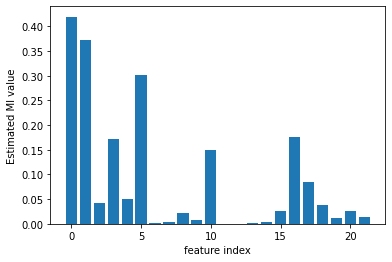

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression

# feature selection
f_selector = SelectKBest(score_func=mutual_info_regression, k='all')
# learn relationship from training data
f_selector.fit(x_train_scaled, y_train)
# transform train input data
X_train_fs = f_selector.transform(x_train_scaled)
# transform test input data
X_test_fs = f_selector.transform(x_test_scaled)
# Plot the scores for the features
plt.bar([i for i in range(len(f_selector.scores_))], f_selector.scores_)
plt.xlabel("feature index")
plt.ylabel("Estimated MI value")
plt.show()

**Final Interpretation for Best Feature** - The factors/features which impacts or fetches more money for the houses is Area followed by INT SQ.FT feature. 
